In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#california house prediction dataset from kaggle
data = pd.read_csv("D:/House Price Prediction/housing.csv")

In [47]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
#To see if there are any non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
#Since only 200 records are null we are dropping them 
data.dropna(inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [51]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
#dropping the target variable
X = data.drop(['median_house_value'],axis=1)
Y = data['median_house_value']

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

In [53]:
train_data = X_train.join(Y_train)

In [54]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7599,-118.25,33.89,36.0,406.0,71.0,268.0,77.0,3.9000,<1H OCEAN,115800.0
7694,-118.12,33.96,38.0,1301.0,264.0,877.0,275.0,4.6250,<1H OCEAN,191300.0
13369,-117.57,34.13,5.0,6135.0,879.0,2795.0,781.0,5.9369,INLAND,225200.0
7229,-118.16,34.02,44.0,1218.0,374.0,1175.0,342.0,1.9688,<1H OCEAN,173900.0
9300,-122.57,38.02,33.0,9531.0,1487.0,3798.0,1409.0,5.6512,NEAR BAY,314000.0
...,...,...,...,...,...,...,...,...,...,...
18172,-122.02,37.36,24.0,1709.0,437.0,892.0,408.0,4.9671,<1H OCEAN,335200.0
18811,-121.63,40.92,23.0,1922.0,411.0,872.0,350.0,2.2337,INLAND,64500.0
12209,-117.02,33.60,7.0,1972.0,352.0,964.0,317.0,3.2440,INLAND,337200.0
19680,-121.63,39.15,27.0,2991.0,637.0,1419.0,606.0,1.8849,INLAND,73500.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

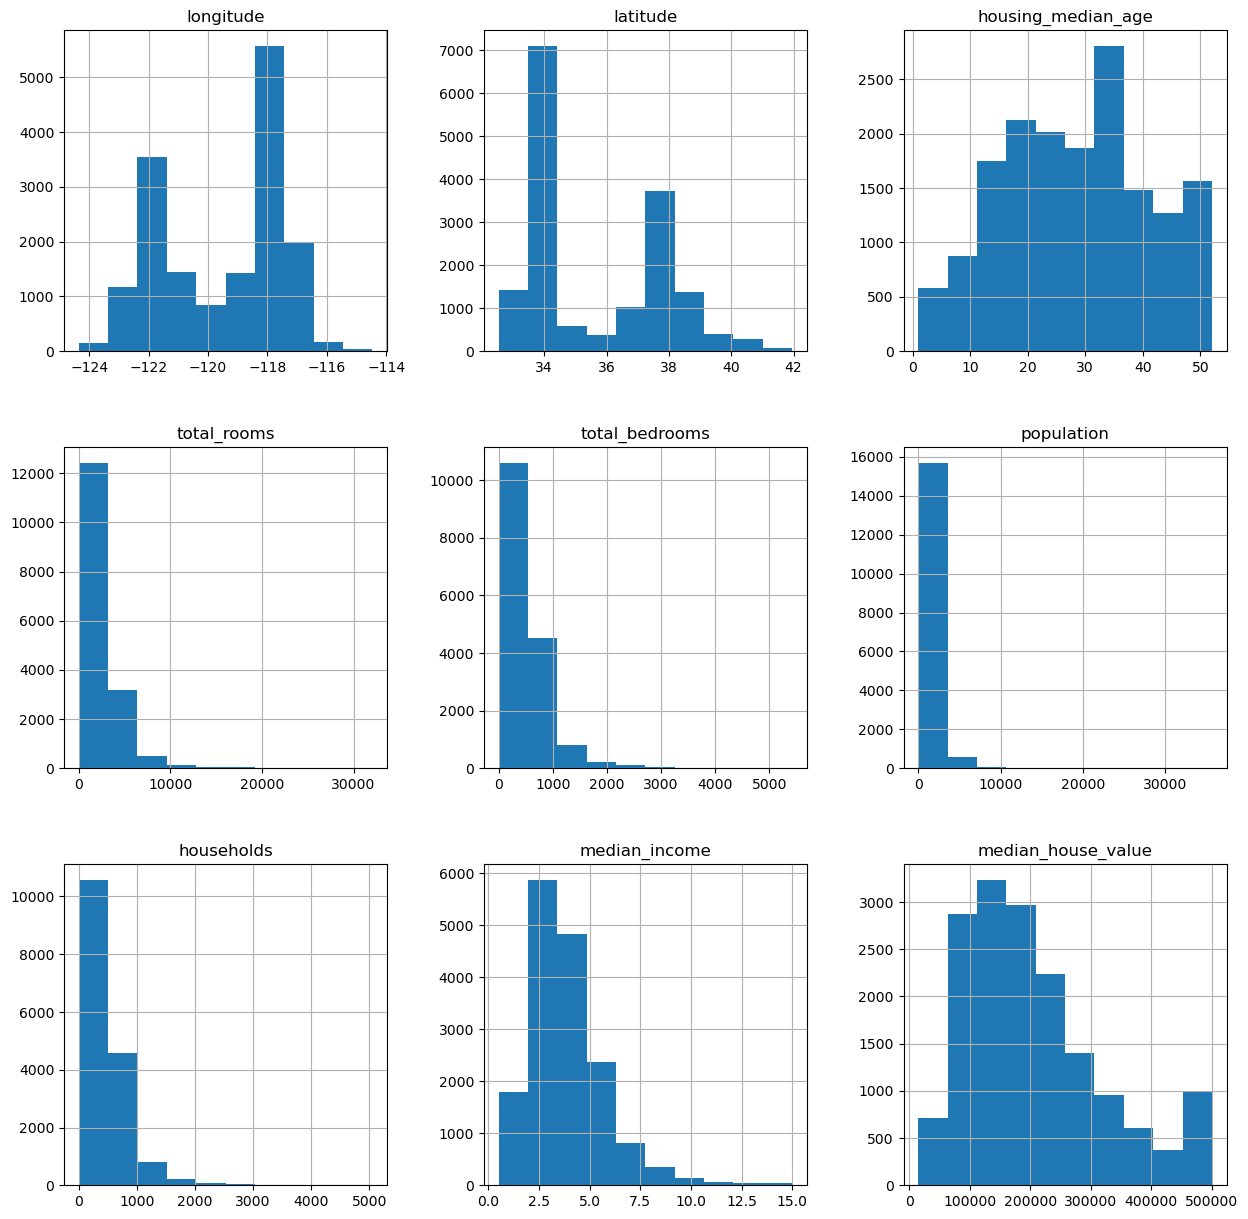

In [55]:
train_data.hist(figsize=(15,15))

<AxesSubplot:>

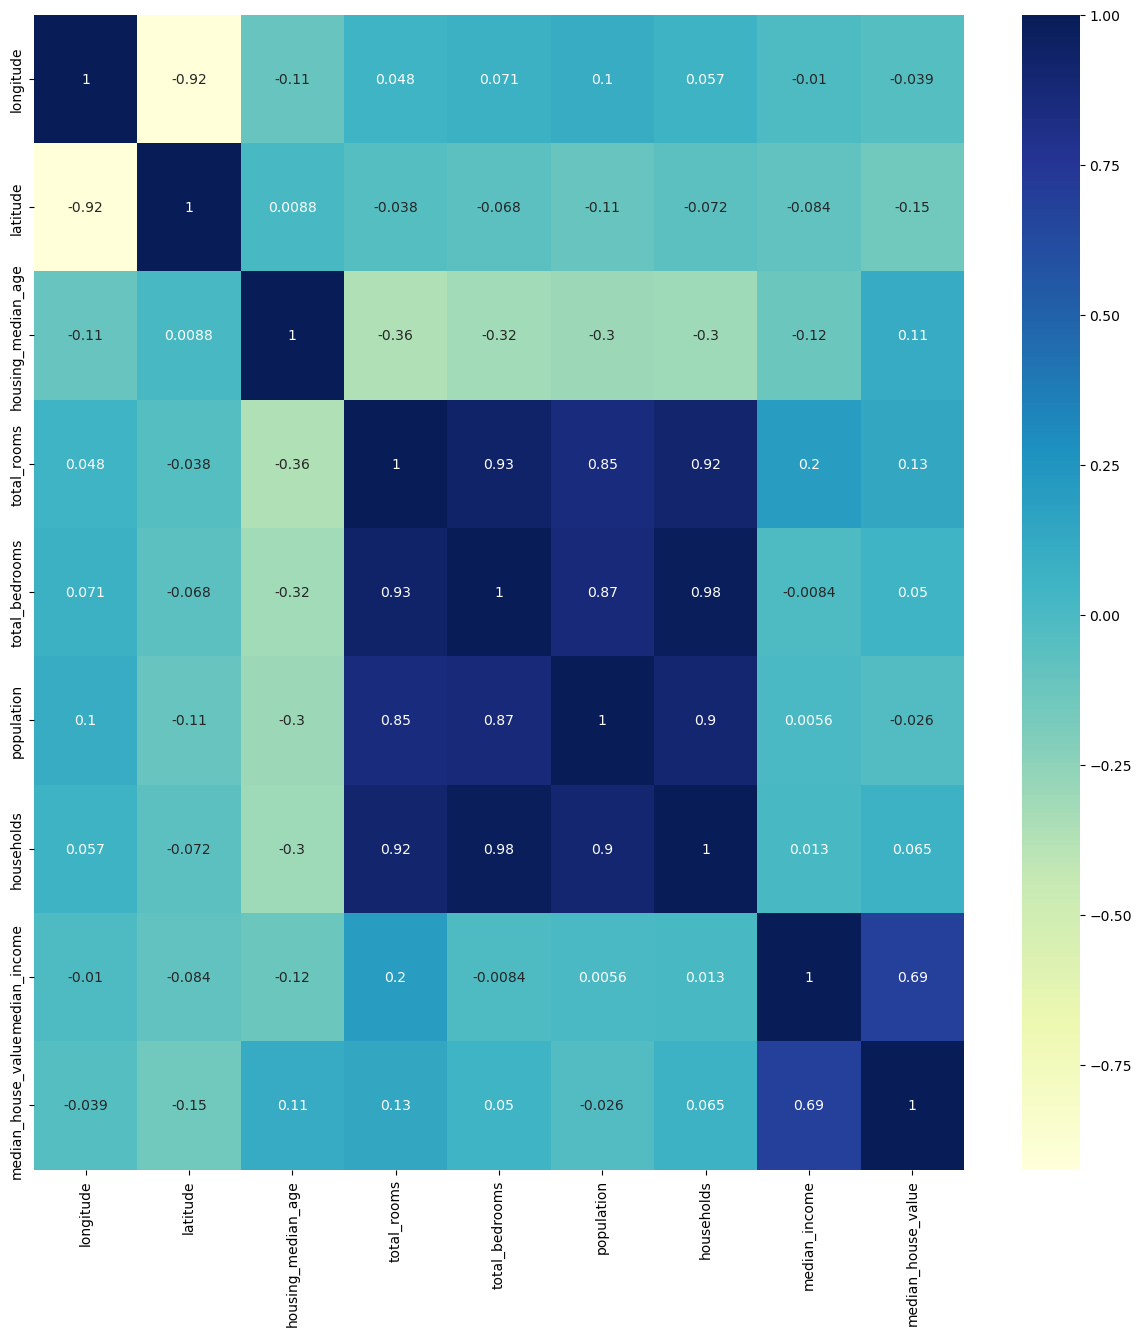

In [56]:
#Visualizing correlation with target variable
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
#median_income correlates highly with median_house_value

In [57]:
#Data pre-processing
#Skewed to normal distributions
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

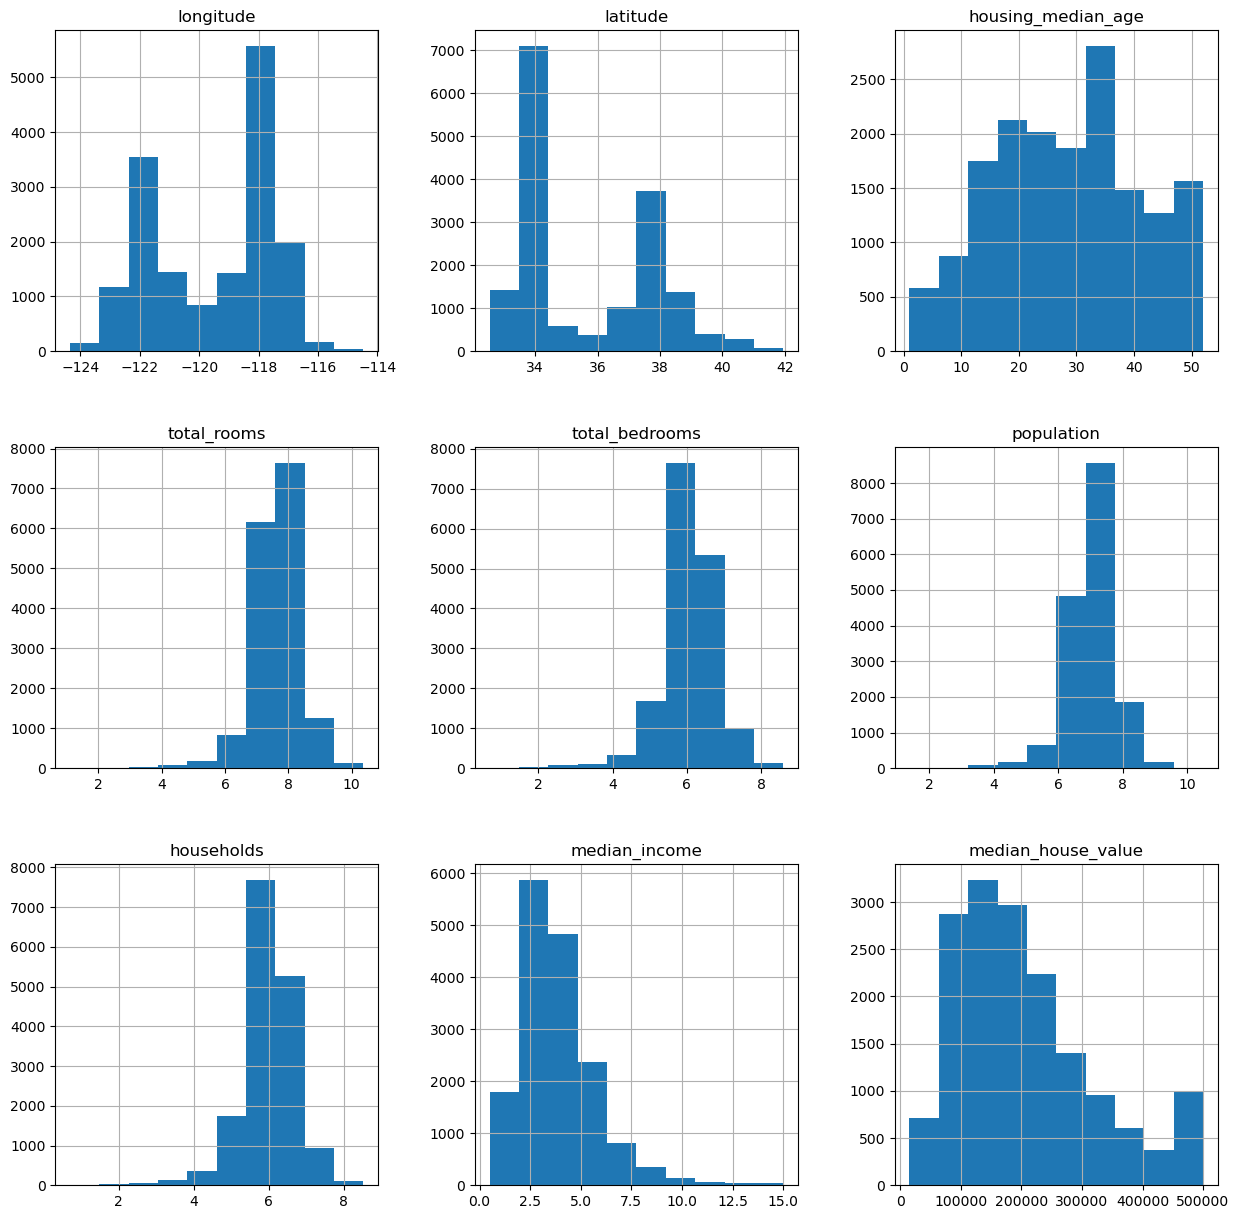

In [58]:
train_data.hist(figsize=(15,15))

In [59]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7220
INLAND        5213
NEAR OCEAN    2100
NEAR BAY      1810
ISLAND           3
Name: ocean_proximity, dtype: int64

In [60]:
#Converting categorical values to numerical of ocean_proximity and dropping it 
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<AxesSubplot:>

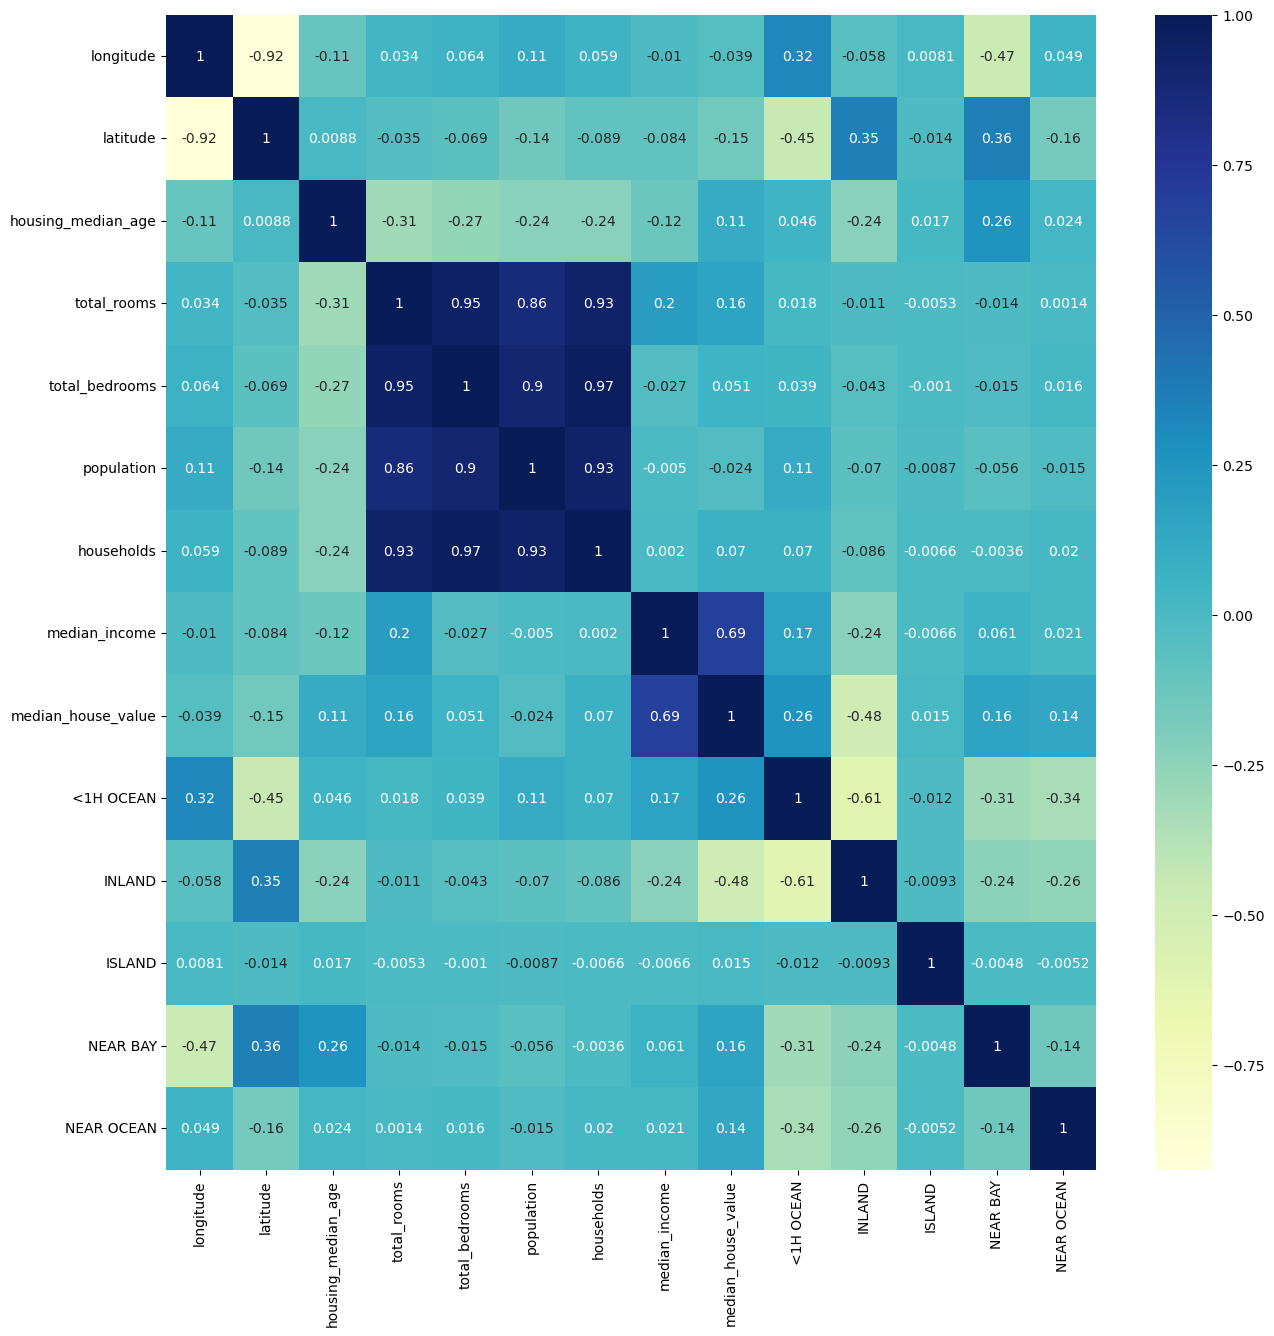

In [61]:
#Visualizing correlation with target variable
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
#If inland less prices compred to <1H from ocean

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

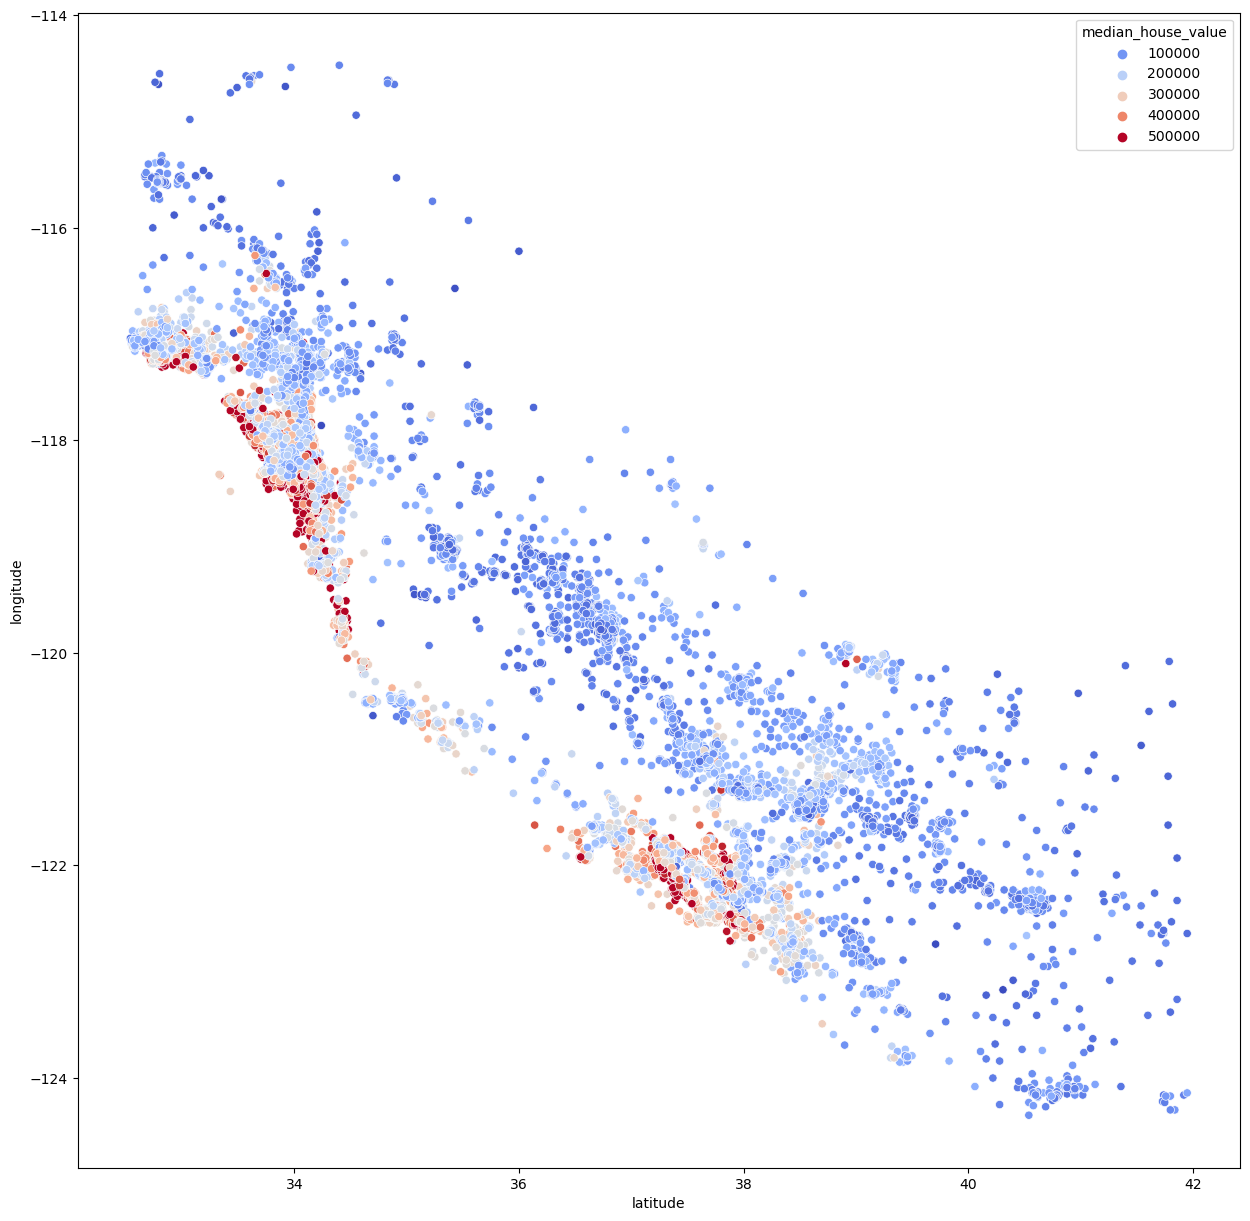

In [62]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [63]:
#Finding how many rooms are bed rooms
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

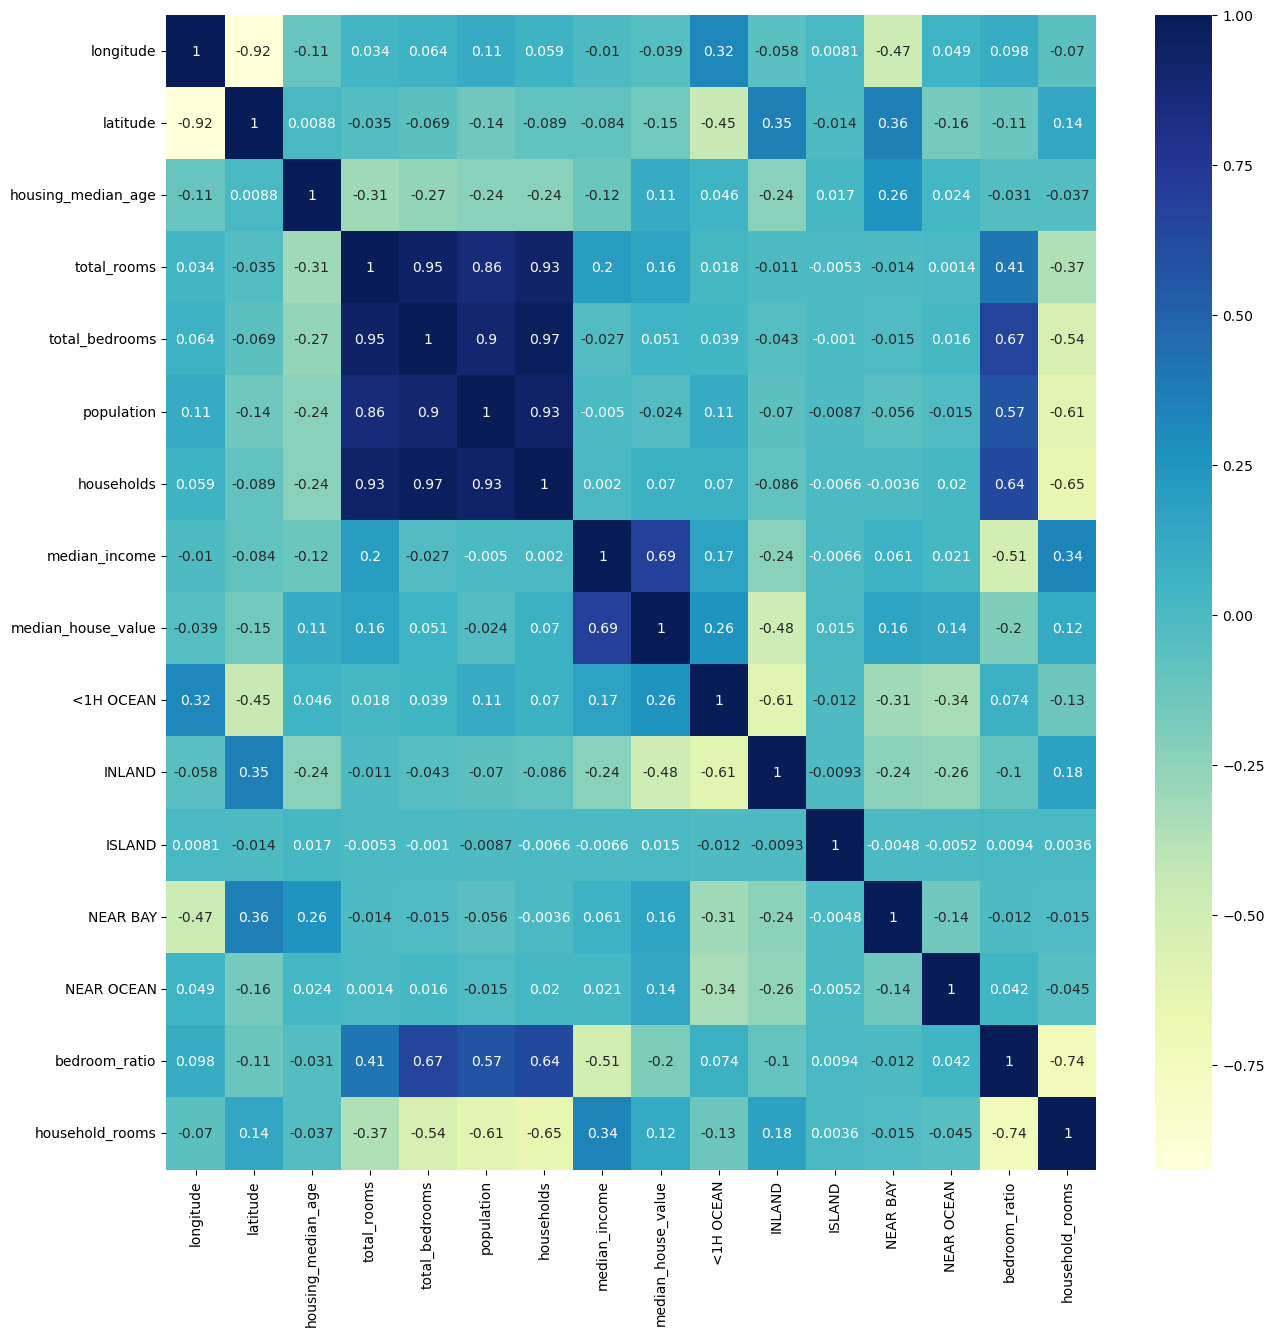

In [64]:
#Visualizing correlation with target variable
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [65]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,Y_train)

LinearRegression()

In [66]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test,Y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [67]:
X_test_s = scaler.fit_transform(X_test)

In [68]:
reg.score(X_test_s,Y_test)

0.6802070861214389

In [71]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train_s,Y_train)

RandomForestRegressor()

In [72]:
forest.score(X_test_s,Y_test)

0.8019245825456154

In [ ]:
#Cross validation
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid = {
    "n_estimators":[100, 200, 300],
    "max_features":[None, 4, 8],
    "min_samples_split":[2, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring = "neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(X_train_s, Y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s,Y_test)